In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import warnings




In [2]:
from  google.colab import files
files.upload()

Saving train-chennai-sale.csv to train-chennai-sale.csv


{'train-chennai-sale.csv': b'PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE\r\nP03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.33,380000,144400,7600000\r\nP09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770\r\nP01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.09,421094,92114,13159200\r\nP05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr ,Paved,I,4.7,3.9,3.6,4.01,356321,77042,9630290\r\nP06210,Karapakkam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.29,237000,74063,7406250\r\nP00219,Chrompet,1220,11-09-2014,36,2,1,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2

In [3]:
df=pd.read_csv(r'train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**Data cleaning process**

In [5]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
## filling the missing values
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

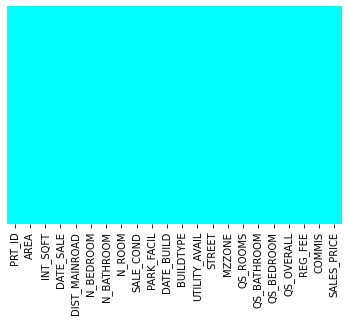

In [7]:
# rechecking the missing vales using hetamap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

In [8]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

in every coloumn there is a incorrected name so im going to replace it to a original name


In [9]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [10]:
#replacing the sale condition column names
df['SALE_COND'].replace(["Adj Land","Partiall","PartiaLl","Ab Normal"],["AdjLand","Partial","Partial","AbNormal"],inplace=True)
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [11]:
##replacing the some values in STReet column
df['STREET'].replace(["Pavd"],["Paved"],inplace=True)
df['STREET'].replace(["NoAccess"],["No Access"],inplace=True)
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [12]:
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [13]:
#replacing the some values in area column
df['AREA'].replace(["Chrompt","Chormpet","Chrmpet"],["Chrompet","Chrompet","Chrompet"],inplace=True)
df['AREA'].replace(['Ann Nagar',"Karapakam","KKNagar","Velchery","Ana Nagar","Adyr","TNagar"],["Anna Nagar","Karapakkam","KK Nagar","Velachery","Anna Nagar","Adyar","T Nagar"],inplace=True)
df.AREA.value_counts()




Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [14]:
#replacing the some values in area column
df['PARK_FACIL'].replace(["Noo"],["No"],inplace=True)
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [15]:
#replacing the some values in ut column
df['UTILITY_AVAIL'].replace(['All Pub','NoSeWa'],['AllPub',"nosew"],inplace=True)
df.UTILITY_AVAIL.value_counts()

AllPub     1887
nosew      1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [16]:
df['UTILITY_AVAIL'].replace(['NoSeWa '],["nosew"],inplace=True)
df.UTILITY_AVAIL.value_counts()

AllPub     1887
nosew      1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [17]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [18]:

df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

## **Data visulization** 


In [19]:
df1=df

([<matplotlib.patches.Wedge at 0x7f65e7ba9fd0>,
 [Text(0.8032484365231517, 0.7515264128579331, 'Chrompet'),
  Text(-0.5628592660701728, 0.9450870047773098, 'Karapakkam'),
  Text(-1.0999381315985275, -0.011666475712068141, 'KK Nagar'),
  Text(-0.6968574259037306, -0.8511108787712837, 'Velachery'),
  Text(0.10508232803705282, -1.0949692709543557, 'Anna Nagar'),
  Text(0.7782470962960003, -0.7773875848679629, 'Adyar'),
  Text(1.0731499132556381, -0.24155592246810362, 'T Nagar')],
 [Text(0.43813551083081, 0.40992349792250893, '23.94%'),
  Text(-0.3070141451291851, 0.5155020026058053, '19.22%'),
  Text(-0.5999662535991968, -0.0063635322065826215, '14.02%'),
  Text(-0.3801040504929439, -0.4642422975116092, '13.80%'),
  Text(0.057317633474756075, -0.5972559659751031, '11.08%'),
  Text(0.4244984161614547, -0.4240295917461615, '10.89%'),
  Text(0.585354498139439, -0.13175777589169285, '7.05%')])

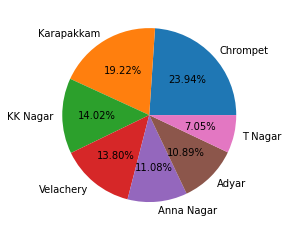

In [20]:
##plot chart for area location
AREA_name=df1.AREA.value_counts().index
AREA_val=df1.AREA.value_counts().values
plt.pie(AREA_val[:10],labels=AREA_name[:10],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7f65e7b2c410>,
 [Text(0.518415876993364, 0.9701778076626993, 'House'),
  Text(-1.0985798125985704, -0.05587839789122603, 'Others'),
  Text(0.5670300922549522, -0.9425905126179346, 'Commercial')],
 [Text(0.28277229654183483, 0.529187895088745, '34.38%'),
  Text(-0.5992253523264929, -0.03047912612248692, '32.86%'),
  Text(0.30928914122997386, -0.5141402796097825, '32.76%')])

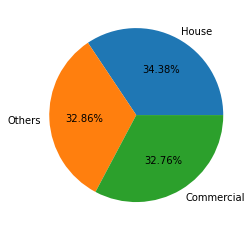

In [21]:
#lets check the building types with percentage
BUILDTYPE_name=df1.BUILDTYPE.value_counts().index
BUILDTYPE_val=df1.BUILDTYPE.value_counts().values
plt.pie(BUILDTYPE_val[:5],labels=BUILDTYPE_name[:5],autopct='%1.2f%%')

In [22]:
len(df.columns)

22

In [23]:
# Adding a new column of price_per_sqft
df1 = df
df1.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['SALES_PRICE']/df1['INT_SQFT'])
df1.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,price_per_sqft
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750,10159.631148
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790,7274.027421
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250,9095.966432
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970,10776.874189
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650,4944.128440


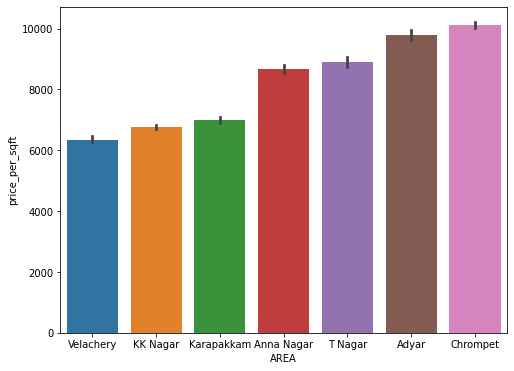

In [24]:
#lets check build date with  price per sqft
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,6)
sns.barplot(x='AREA',y='price_per_sqft' , data=df1, order = df1.groupby('AREA')['price_per_sqft'].mean().reset_index().sort_values('price_per_sqft')['AREA'])

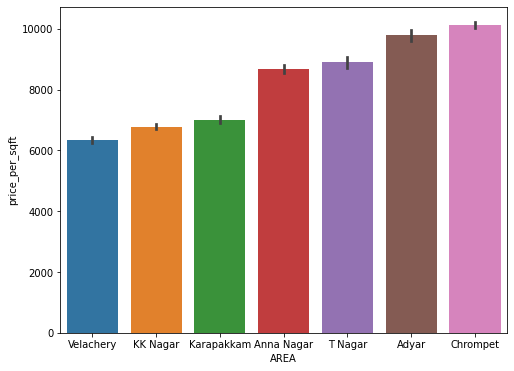

In [25]:
matplotlib.rcParams['figure.figsize']=(8,6)
sns.barplot(x='AREA',y='price_per_sqft' , data=df1, order = df1.groupby('AREA')['price_per_sqft'].mean().reset_index().sort_values('price_per_sqft')['AREA'])

In [26]:
numerical_feature = [feature for feature in df1.columns if df1[feature].dtypes !='0']
print('number of numerical variables:', len(numerical_feature))
numerical_features=df1[numerical_feature]
numerical_features

number of numerical variables: 23


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,price_per_sqft
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,8951.505017
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,5702.941487
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,5174.355638
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,10809.402795


In [27]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

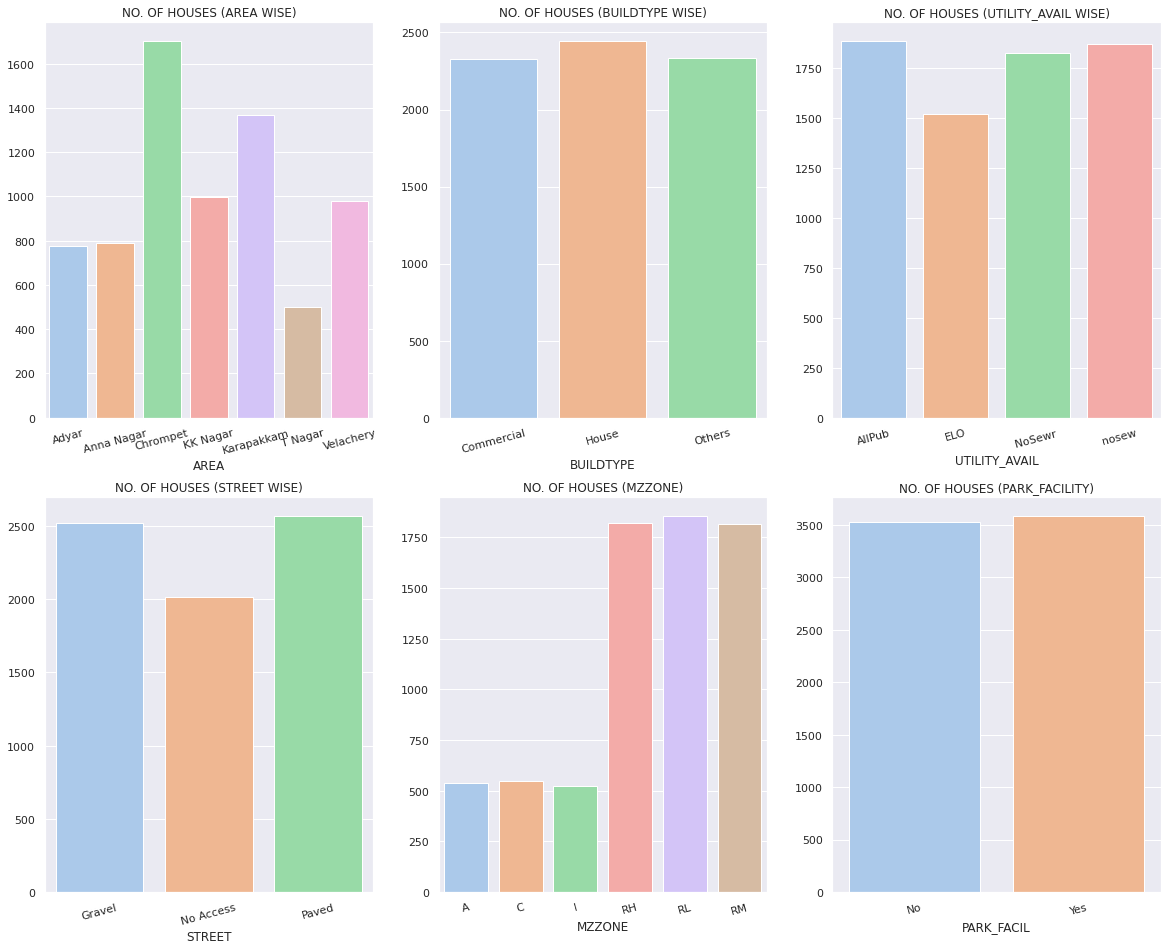

In [28]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

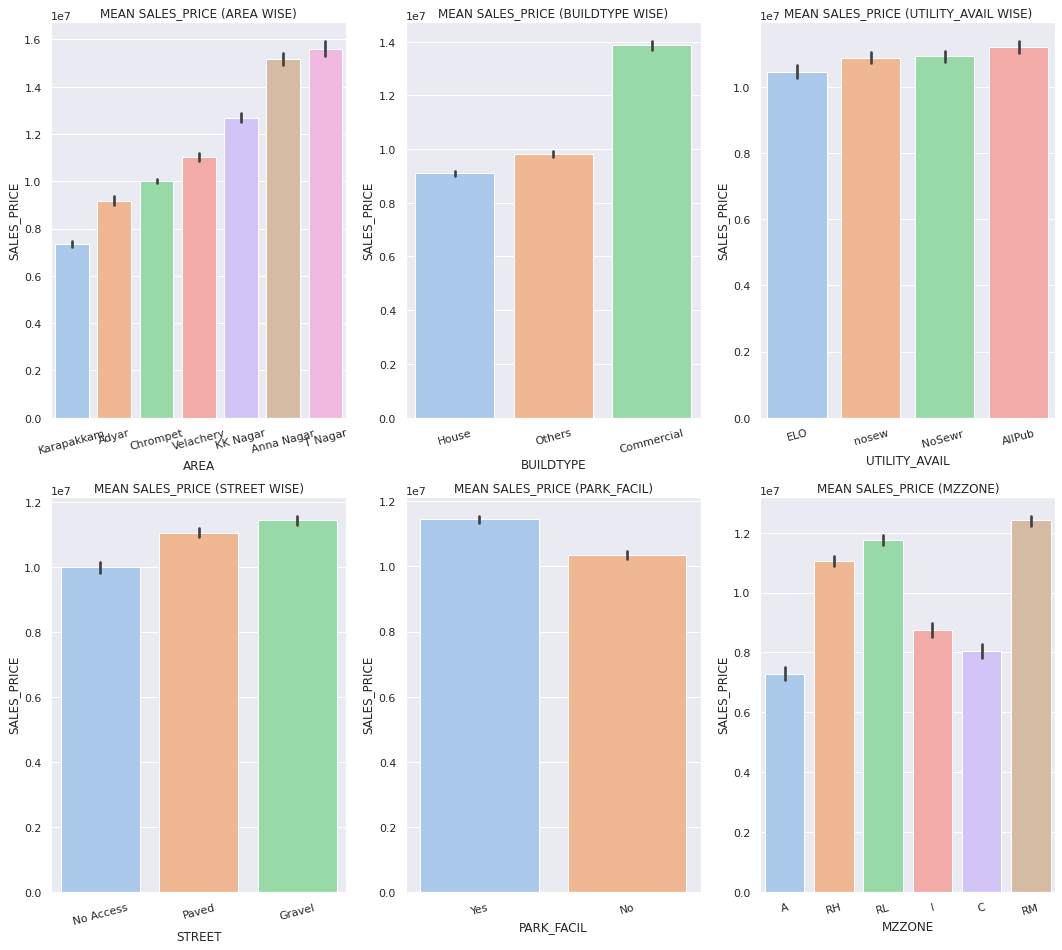

In [29]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(18,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [30]:
# Adding a new column of price_per_sqft
df1 = df.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['SALES_PRICE']/df1['INT_SQFT'])
df1.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,price_per_sqft
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,7569.721116
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,10935.433031
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,14476.567657
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,5191.530997
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,6040.986949


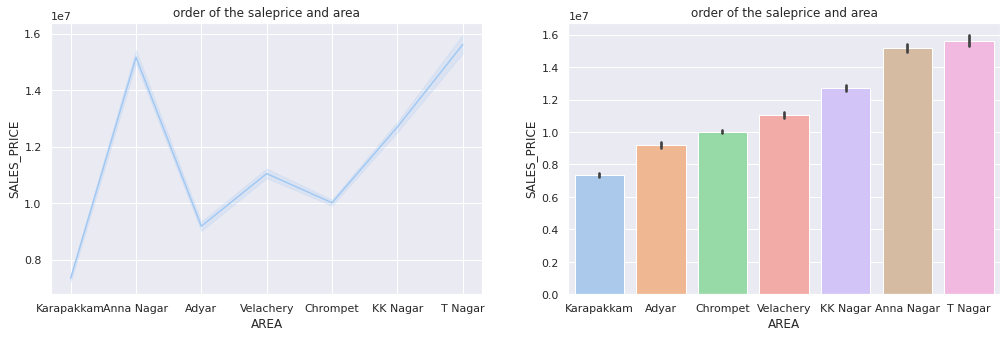

In [31]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('order of the saleprice and area')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE') ['AREA'])
plt.title('order of the saleprice and area')
plt.show()

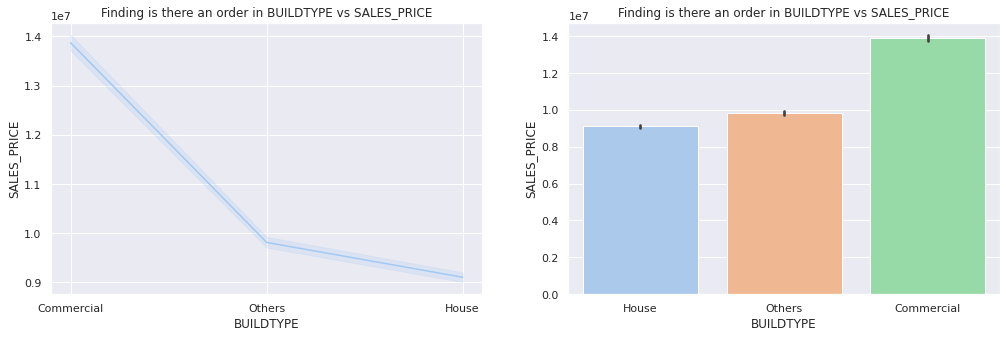

In [32]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

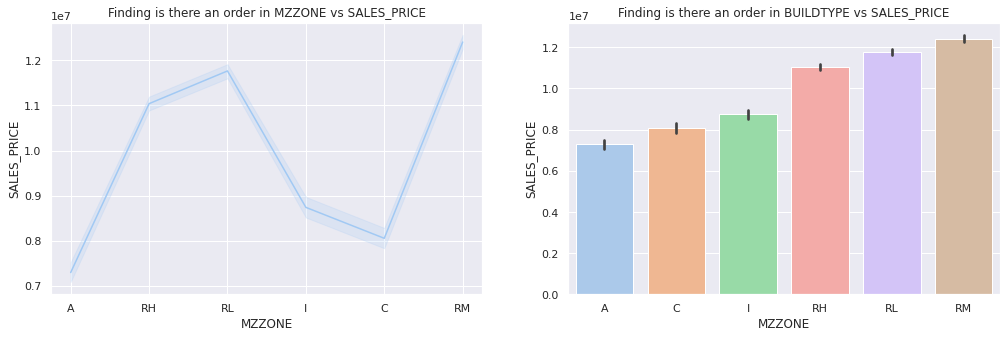

In [33]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

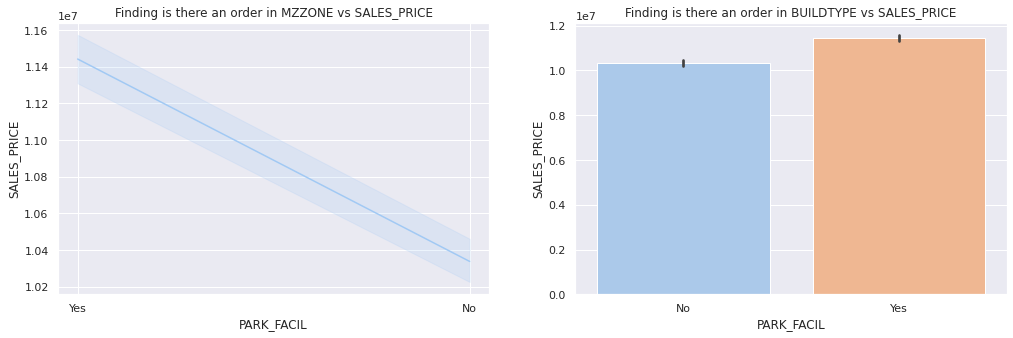

In [34]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

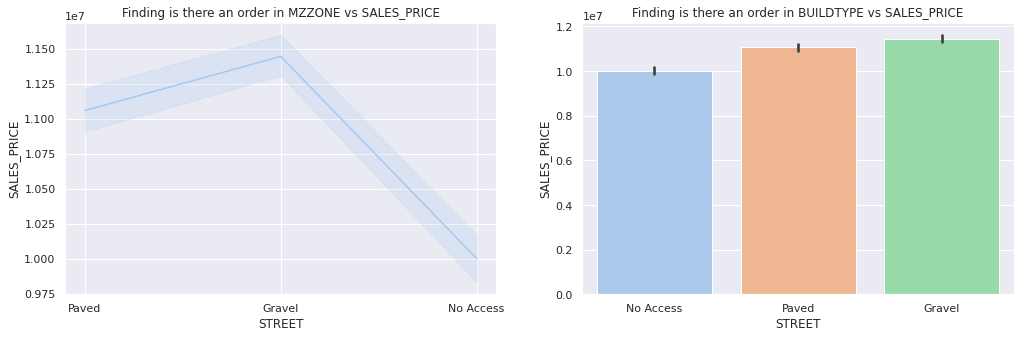

In [35]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['STREET'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

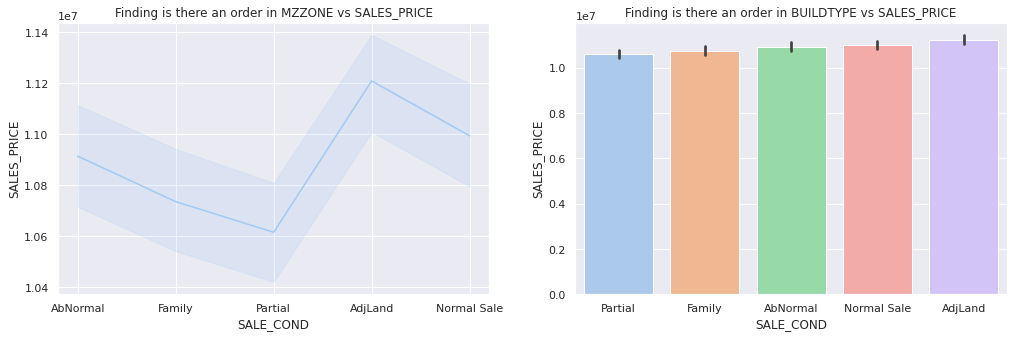

In [36]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['SALE_COND'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

**NOTE : In above all the graphs there is an linear trend. For Encoding this categorical variable we have to use Label Encoding.**

In [37]:
#CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD
df1['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df1['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df1.dtypes.value_counts())

,0
object,8
float64,7
int64,6
datetime64[ns],2


In [38]:
df1['BUILD_YEAR'] = df1["DATE_BUILD"].dt.year
df1['SALE_YEAR'] = df1['DATE_SALE'].dt.year
df1["SOLD_AGE"]=df1['SALE_YEAR']-df1['BUILD_YEAR']
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'price_per_sqft', 'BUILD_YEAR', 'SALE_YEAR', 'SOLD_AGE'],
      dtype='object')

**Droping the feature because it make no sense**                                     
1.removing [DATE_SALE,DATE_BUILD]these two column because i update with building year and sale year                                                                      
2.removing part id also beacase its not necessary for model building


In [39]:
df1.drop(["DATE_SALE","DATE_BUILD","PRT_ID",'REG_FEE', 'COMMIS'],axis=1,inplace=True)

In [40]:
#just checking rmoved and remaining column 
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'price_per_sqft', 'BUILD_YEAR',
       'SALE_YEAR', 'SOLD_AGE'],
      dtype='object')

**checking the relation with target variable**

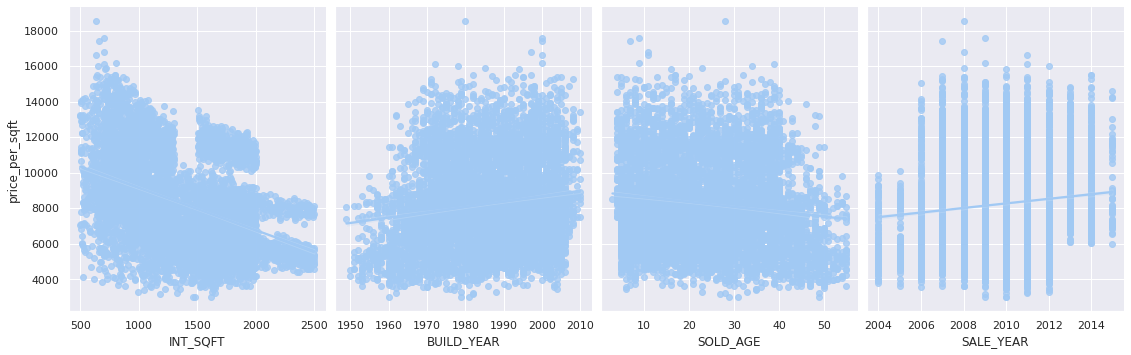

In [41]:
sns.pairplot(df1,x_vars=["INT_SQFT" , 'BUILD_YEAR','SOLD_AGE',"SALE_YEAR"],y_vars=["price_per_sqft"],height=5,aspect=.8, kind="reg")
plt.show()

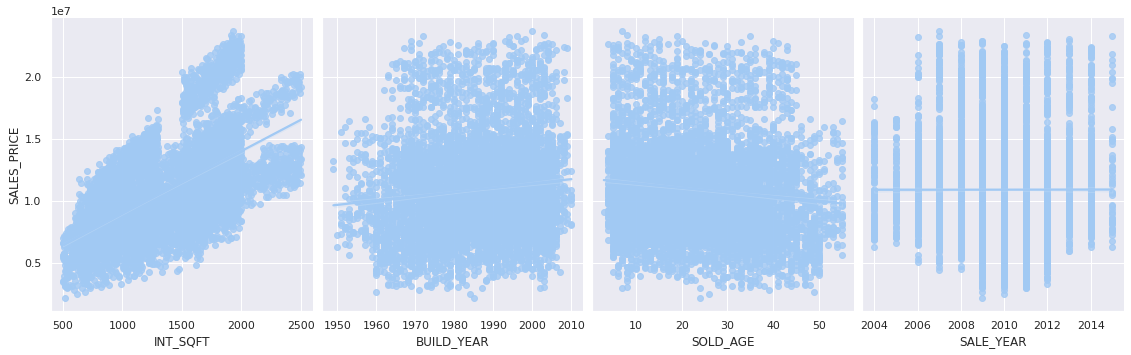

In [42]:
sns.pairplot(df1,x_vars=["INT_SQFT" , 'BUILD_YEAR','SOLD_AGE',"SALE_YEAR"],y_vars=["SALES_PRICE"],height=5,aspect=.8, kind="reg")
plt.show()

in the above graph i checked that whether there is any linear relationship with target variable. int_sqft is the only graph is connecting to the linear relation with target variable(sales_price).

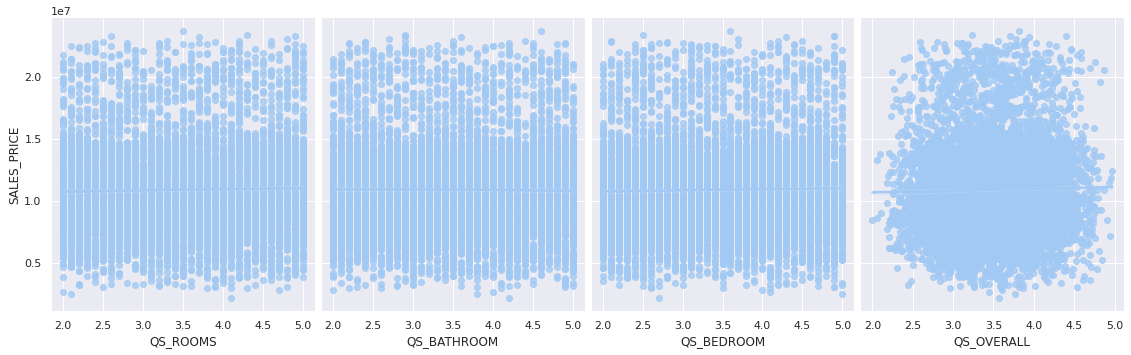

In [43]:
sns.pairplot(df1,x_vars=['QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM','QS_OVERALL'],y_vars=["SALES_PRICE"],height=5,aspect=.8, kind="reg")
plt.show()

checking these feature in graph is tehre any linear relationship wwith target variable but unfortnetly there is no linear relationship with target variable(sales_price)

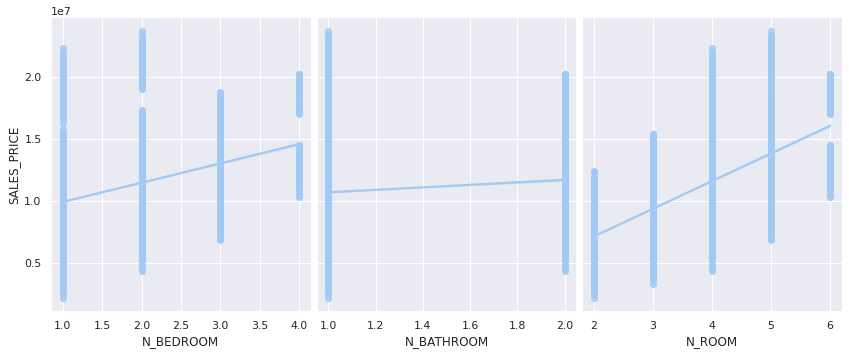

In [44]:
sns.pairplot(df1,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In above graph i have checked other few features has a linear relationship with target_variable('SALES_PRICE'). ["N_ROOMS","N_BEDROOM"] has the linear relationship with the target_variable(SALES_PRICE). But "N_BATHROOM" has no linear relationship with the target_variable('SALES_PRICE').

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [46]:
df1['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df1['AREA']=le.fit_transform(df['AREA'])
df1['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df1['SALE_COND']=le.fit_transform(df['SALE_COND'])
df1['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df1['STREET']=le.fit_transform(df['STREET'])
df1['MZZONE']=le.fit_transform(df['MZZONE'])
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,price_per_sqft,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,4,1004,131,1.0,1.0,3,0,1,0,0,...,0,4.0,3.9,4.9,4.330,7600000,7569.721116,1967,2011,44
1,1,1986,26,2.0,1.0,5,0,0,0,0,...,3,4.9,4.2,2.5,3.765,21717770,10935.433031,1995,2006,11
2,0,909,70,1.0,1.0,3,0,1,0,1,...,4,4.1,3.8,2.2,3.090,13159200,14476.567657,1992,2012,20
3,6,1855,14,3.0,2.0,5,2,0,2,2,...,2,4.7,3.9,3.6,4.010,9630290,5191.530997,1988,2010,22
4,4,1226,84,1.0,1.0,3,0,1,2,0,...,1,3.0,2.5,4.1,3.290,7406250,6040.986949,1979,2009,30


CORRELATION WITHIN THE FEATURES.



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [48]:
x=df1.drop(['SALES_PRICE','price_per_sqft'],axis=1)
y=df1['SALES_PRICE']
df1.head(2)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,price_per_sqft,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,4,1004,131,1.0,1.0,3,0,1,0,0,...,0,4.0,3.9,4.9,4.330,7600000,7569.721116,1967,2011,44
1,1,1986,26,2.0,1.0,5,0,0,0,0,...,3,4.9,4.2,2.5,3.765,21717770,10935.433031,1995,2006,11


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.20,random_state=1)
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((5688, 19), (1421, 19), (5688,), (1421,))

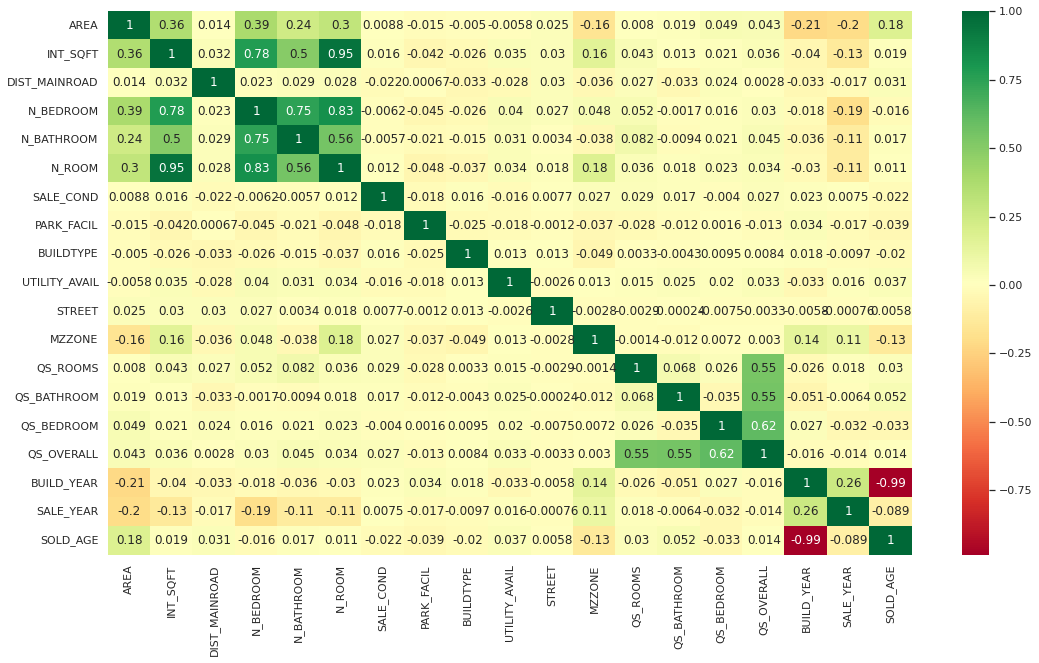

In [50]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [51]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'N_ROOM', 'SOLD_AGE'}


In [53]:
cwf_train=x_train.drop(corr_features,axis=1)
cwf_test=x_test.drop(corr_features,axis=1)

In [54]:
cwf_train.shape

(1421, 17)

In [55]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [56]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 23)
NOW THE NO. OF FEATURE IS: (7109, 18)
5 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,UTILITY_AVAIL,QS_BATHROOM,SALE_YEAR,SALES_PRICE
SALES_PRICE,0.612125,-0.436276,0.427789,0.330987,0.146428,0.116043,0.108834,-0.042652,-0.030732,0.021967,0.020485,-0.019138,0.018804,0.018783,-0.017797,-0.011377,0.000906,1.0


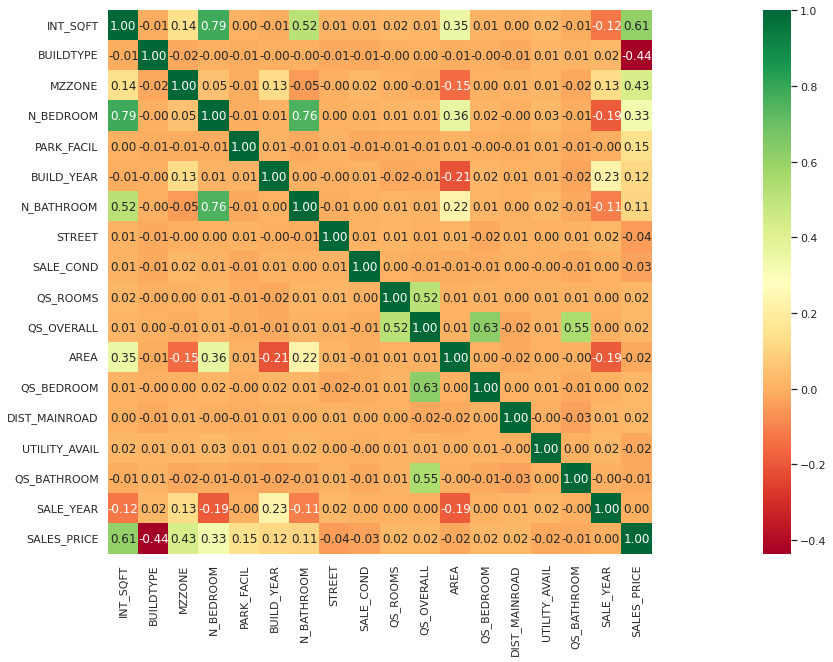

In [156]:
#correlation matrix
corrmat = new_df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(new_df[new_df.columns[:]].corr()["SALES_PRICE"][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
scaler=StandardScaler()
minmax=MinMaxScaler()

In [108]:
x_train=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [109]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [110]:
best_features_x = SelectKBest(score_func=f_regression,k=10).fit_transform(X,y)


In [111]:
correlation_list=[]
for column in x.columns:
  corr_list=pearsonr(x[column],y)
  correlation_list.append([column,corr_list[0],corr_list[1]])

In [112]:
corr_df=pd.DataFrame(correlation_list,columns=['Features','Correlation','P-Value'])
corr_df.sort_values(by='P-Value',inplace=True)
corr_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Features,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,UTILITY_AVAIL,QS_BATHROOM,SALE_YEAR
Correlation,0.612125,-0.436276,0.427789,0.330987,0.146428,0.116043,0.108834,-0.042652,-0.030732,0.021967,0.020485,-0.019138,0.018804,0.018783,-0.017797,-0.011377,0.000906
P-Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000322,0.00956,0.064015,0.084155,0.106634,0.112895,0.113289,0.133516,0.337486,0.939123


In [113]:
model_training_feature1 = corr_df['Features']
model_training_feature1 = model_training_feature1.to_list()
model_training_feature = corr_df['Features']
model_training_feature = model_training_feature.to_list()
model_training_feature

['INT_SQFT',
 'BUILDTYPE',
 'MZZONE',
 'N_BEDROOM',
 'PARK_FACIL',
 'BUILD_YEAR',
 'N_BATHROOM',
 'STREET',
 'SALE_COND',
 'QS_ROOMS',
 'QS_OVERALL',
 'AREA',
 'QS_BEDROOM',
 'DIST_MAINROAD',
 'UTILITY_AVAIL',
 'QS_BATHROOM',
 'SALE_YEAR']

In [114]:
new_df = pd.DataFrame(new_df,columns=model_training_feature)
new_df=pd.concat([new_df,df['SALES_PRICE']],axis=1)
new_df.head(2)

,INT_SQFT,BUILDTYPE,MZZONE,N_BEDROOM,PARK_FACIL,BUILD_YEAR,N_BATHROOM,STREET,SALE_COND,QS_ROOMS,QS_OVERALL,AREA,QS_BEDROOM,DIST_MAINROAD,UTILITY_AVAIL,QS_BATHROOM,SALE_YEAR,SALES_PRICE
0,1004,0,0,1.0,1,1967,1.0,2,0,4.0,4.330,4,4.9,131,0,3.9,2011,7600000
1,1986,0,3,2.0,0,1995,1.0,0,0,4.9,3.765,1,2.5,26,0,4.2,2006,21717770


**VARIANCE INFLATION FACTOR**

In [115]:
x=new_df.drop(['SALES_PRICE'],axis=1)
y=new_df['SALES_PRICE']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [117]:
#if VIF is more than 4 then we have change the feature. 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
r2=lr_model.score(X_train,y_train)
vif=1/(1-r2)
vif

4.577894673411266

**MACHINE LEARNING MODEL:**                                             
Will try all the regression model and use which will give me the highest score in my cross_validation/test data.

In [69]:
df2=new_df


In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [119]:
x=new_df.drop('SALES_PRICE',axis=1)
y=df1['SALES_PRICE']

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AREA            7109 non-null   int64  
 1   INT_SQFT        7109 non-null   int64  
 2   DIST_MAINROAD   7109 non-null   int64  
 3   N_BEDROOM       7109 non-null   float64
 4   N_BATHROOM      7109 non-null   float64
 5   SALE_COND       7109 non-null   int64  
 6   PARK_FACIL      7109 non-null   int64  
 7   BUILDTYPE       7109 non-null   int64  
 8   UTILITY_AVAIL   7109 non-null   int64  
 9   STREET          7109 non-null   int64  
 10  MZZONE          7109 non-null   int64  
 11  QS_ROOMS        7109 non-null   float64
 12  QS_BATHROOM     7109 non-null   float64
 13  QS_BEDROOM      7109 non-null   float64
 14  QS_OVERALL      7109 non-null   float64
 15  SALES_PRICE     7109 non-null   int64  
 16  price_per_sqft  7109 non-null   float64
 17  BUILD_YEAR      7109 non-null   i

In [121]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5687, 17), (1422, 17), (5687,), (1422,))

In [122]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

**WITH CROSS VALIDATION.**

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [124]:
CV_Linear_regression = cross_val_score(lr_model,x_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.7796509130020512


In [125]:
CV_XG_Boost = cross_val_score(xg_model,x_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[03:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:28:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:28:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:29:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [126]:
CV_RandomForest = cross_val_score(rf,x_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_RandomForest)

The cross_validation score of an XG_Boost model is: 0.7822019689287825


**R_SQUARED_SCORES**                                                                 
The cross_validation score of an Linear_Regression model is : 0.7796509130020512  
                                                                             The cross_validation score of an XG_Boost model is : 0.9989088986795005   
The cross_validation score of an Random_Forest model is :  0.7822019689287825





**WITHOUT CROSS_VALIDATION.**

1st MODEL IS LINEAR REGRESSION.

In [127]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()


In [128]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [129]:

lr_y_pred=lr_model.predict(x_test)


In [131]:
print(r2_score(y_test,lr_y_pred))

0.7738839611103361


**2nd MODEL IS XGBOOST.**

In [154]:
import xgboost as xg

xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                )

In [134]:
xg_model.fit(x_train_scaled,y_train)

[03:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [146]:
xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1.5, missing=None, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(colsample_bytree=0.4, gamma=2, gpu_id=-1,
             interaction_constraints='', learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
xg_y_pred=xg_model.predict(x_test_scaled)

In [149]:
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

XGBoost model Rsquared metric: 0.9988001059279107


**3rd MODEL IS RANDOM FOREST.**

In [150]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
rf_pred = rf.predict(X_test)
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.7799751042184264


In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=1)
model3 = GradientBoostingRegressor(random_state=1)
model4 = DecisionTreeRegressor(random_state=1)
# model4 = xg.XGBRegressor(random_state=1) 
# # we need to give the list of models that we are trying to combine
# model.fit(x_train,y_train) # to train all of the models
# preds = model.predict(x_test)
# model.score(x_test,y_test) # prediction

model = VotingRegressor(estimators=[('Linear_Regg', model1), ('Random_Forest', model2), ('Gradient_Boosting', model3)])
model.fit(x_train,y_train)
et_y_pred=model.predict(X_test)
print("Ensemble Technique Rsquared metric",r2_score(y_test,et_y_pred))

Ensemble Technique Rsquared metric 0.9581815891439669


**R_SQUARED_SCORES.**

*   The cross_validation score of an Linear_Regression model is :0.7738839611103361
*  The cross_validation score of an XG_Boost model is :0.9988001059279107


*   The cross_validation score of an Random_Forest model is : 0.7799751042184264
*   The cross_validation score of an Ensemble_technic model is : 0.9581815891439669





**best model**                                                                             
the xg_boost model is gives accurate result it nearest to 1

**SUGGESTION TO REAL ESTATE AGENT**

If any agent want to build any type of building in chennai. I would suggest him to build a "Commercial" building. When it comes to the location I would suggest him "T Nagar", as the first choice because the 'average/minimum/maximum sales_price' of "T Nagar" is higher than other Area. I would suggest the agent to build with the "Parking facility" and with "All_Utility" . Gravel type street fetches more money than Paved street. I will strongly suggest not to construct any type of building which has no access to the building.

**QUESTIONS TO BUYERS**                                                                
Before answering them. I would like to ask them whether they have any expections/wishes regarding the build type,location, price,...utility?                  
**ANSWER OF BUYERS**                                                                 
He wants to buy a "HOUSE" building with all amenities.                                                                         
**BUYERS**                                                                  
I would let him know that the average sales_price of "house" building is lesser than "Others" & "Commercial" type buildings. When it comes to the location i would suggest my buyer to buy in Karapakam, because the price of price and also it is near to the beach.
Minmum price = 26,40,250.00
Average price = 62,66,439.00
Maximum price = 99,66,750.00 The Maximum price of "House" building in karapakkam is 9966750.00(Ninty nine lakhs sixty six thousand seven fifty) and the average price is 62,66,439.00(sixty two lakhs sixty six thousand four hundred and thirty nine). Since the buyer need with all amenity, he/she can negotiate the price between (90,00,000 - 95,00,000).